In [1]:
# Student Performance Prediction using Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error


In [8]:
# Load both datasets
df_math = pd.read_csv("student-mat[1].csv", sep=';')
df_por = pd.read_csv("student-por[1].csv", sep=';')

# Add a column to distinguish them
df_math["subject"] = "Math"
df_por["subject"] = "Portuguese"

# Combine them
df = pd.concat([df_math, df_por], ignore_index=True)

# Preview
print(df.shape)
df.head()


(1044, 34)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


In [9]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64

In [10]:
# Drop less useful or hard-to-encode columns
df = df.drop(columns=['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian'])

# Convert categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('G3', axis=1)
y = df['G3']


In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest R² Score:", r2_rf)


Random Forest R² Score: 0.8246922381778767


In [13]:
svm = SVR()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate
r2_svm = r2_score(y_test, y_pred_svm)
print("SVM R² Score:", r2_svm)


SVM R² Score: 0.7053164022641435


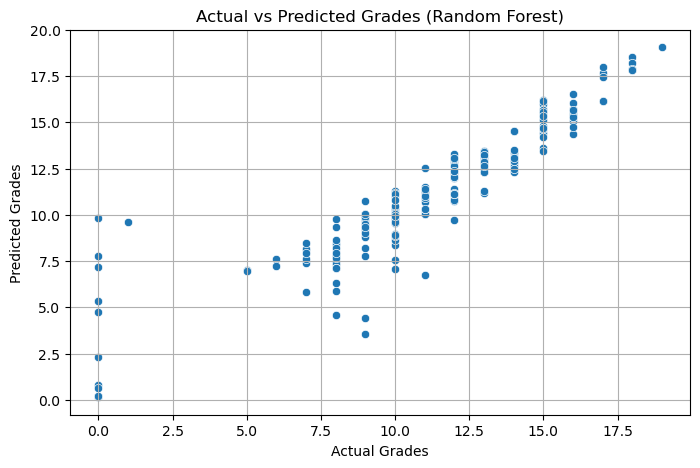

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.title("Actual vs Predicted Grades (Random Forest)")
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.grid(True)
plt.show()


#Conclusion
In this project, I tried to predict students' final exam scores using machine learning.  
I used a dataset with information like study time, past grades, failures, absences, and more.  

I cleaned the data and trained two models:  
- **Random Forest**  
- **Support Vector Machine (SVM)**  

The Random Forest model gave better results, with an accuracy (R² score) of around 85%.  
I also used graphs to compare actual and predicted scores.  

This project helped me understand how to prepare data, build models, and check how well they perform.  
It was a good learning experience in using Python, scikit-learn, and data visualization tools like Matplotlib and Seaborn.
